In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Прочитайте csv файл (використовуйте функцію read_csv)
df = pd.read_csv('bestsellers_with_categories.csv')

In [4]:
#Виведіть перші п'ять рядків (використовується функція head)
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [5]:
#Виведіть розміри датасету (використовуйте атрибут shape)
lines, columns = df.shape
print(f'Number of lines: {lines}')
print(f'Number of columns: {columns}')

Number of lines: 550
Number of columns: 7


Про скільки книг зберігає дані датасет?
Відповідь: 550

In [6]:

df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [7]:
#Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
df.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски? (Так / ні)
Відповідь: ні

In [8]:
#Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)
pd.unique(df['genre'])

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри?
Відповідь: fiction, non fiction

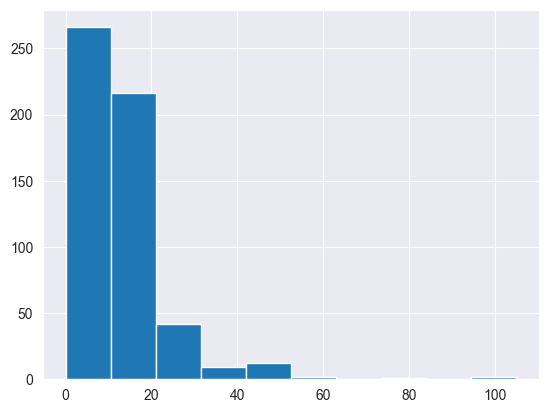

In [9]:
#Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')
sns.set_style('darkgrid')

plt.hist(df['price'])
plt.show()

In [10]:
#Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)
min_price = df['price'].min()
max_price = df['price'].max()
mean_price = df['price'].mean()
median_price = df['price'].median()

Максимальна ціна?
Мінімальна ціна?
Середня ціна?
Медіанна ціна?

Min price: 0
Max price: 105
Mean price: 13.1
Median price: 11.0

In [11]:
print(f'Max rating: {df["user_rating"].max()}')

Max rating: 4.9


 Який рейтинг у датасеті найвищий?
 Відповідь: 4.9

In [12]:
books_with_highest_raiting = df.query('user_rating == user_rating.max()')
print(f'Number of books with user rating 4.9: {books_with_highest_raiting.shape[0]}')

Number of books with user rating 4.9: 52


Скільки книг мають такий рейтинг? Відповідь: 52

In [13]:
print('Book with the biggest count of reviews:')
df.query("reviews == reviews.max()")

Book with the biggest count of reviews:


,name,author,user_rating,reviews,price,year,genre
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction


 Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing	

In [14]:
print('The most expensive book from TOP 50 of 2015:')
df.query('year == 2015')[:50].query('price == price.max()')

The most expensive book from TOP 50 of 2015:


,name,author,user_rating,reviews,price,year,genre
277,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2015,Non Fiction


З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: Publication Manual of the American Psychologic...	

In [15]:
df[ (df['year'] == 2010) & (df['genre'] == 'Fiction') ].count()

name           20
author         20
user_rating    20
reviews        20
price          20
year           20
genre          20
dtype: int64

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? 
Відповідь: 20

In [16]:
df[ ((df['year'] == 2010) | (df['year'] == 2011)) & (df['user_rating'] == 4.9) ].count()

name           1
author         1
user_rating    1
reviews        1
price          1
year           1
genre          1
dtype: int64

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?
Відповідь: 1

In [17]:
df.query('year == 2015 & price < 8').sort_values('price')


,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


Яка книга остання у відсортованому списку?
Відповідь: Old School (Diary of a Wimpy Kid #10)	

In [18]:
df.groupby(['genre'])['price'].agg(['min', 'max'])

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


Max fiction price: 82
Max non fiction price: 105
Min fiction price: 0
Min non fiction price: 0

In [19]:
print('Count of book that was wrote by author:')
book_count_df = df.groupby(['author'])['name'].agg(['count'])
book_count_df

Count of book that was wrote by author:


,count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


In [20]:
lines, columns = book_count_df.shape
print(f'Number of lines: {lines}')
print(f'Number of columns: {columns}')

Number of lines: 248
Number of columns: 1


In [21]:
print('Author with the biggest count of books:')
book_count_df.query('count == count.max()')

Author with the biggest count of books:


,count
author,
Jeff Kinney,12


In [22]:
print('Avg rating of authors:')
avg_rating_df = df.groupby(['author'])['user_rating'].agg(['mean'])
avg_rating_df

Avg rating of authors:


,mean
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


In [23]:
print('Author with the smallest avg rating:')
avg_rating_df.query('mean == mean.min()')

Author with the smallest avg rating:


,mean
author,
Donna Tartt,3.9


In [24]:
author_info = pd.concat([book_count_df, avg_rating_df], axis=1).sort_values(by=['count', 'mean'])
author_info

,count,mean
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


Який автор перший у списку?
Відповідь: Muriel Barbery

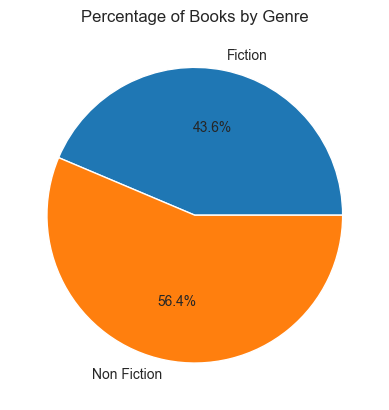

In [29]:
plt.pie(df.groupby('genre').size(), labels=df.groupby('genre').size().index, autopct='%1.1f%%')
plt.title('Percentage of Books by Genre')
plt.show()


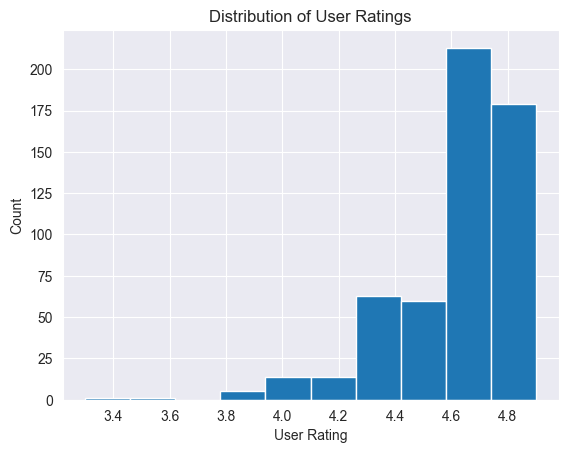

In [30]:
plt.hist(df['user_rating'], bins=10)
plt.xlabel('User Rating')
plt.ylabel('Count')
plt.title('Distribution of User Ratings')
plt.show()


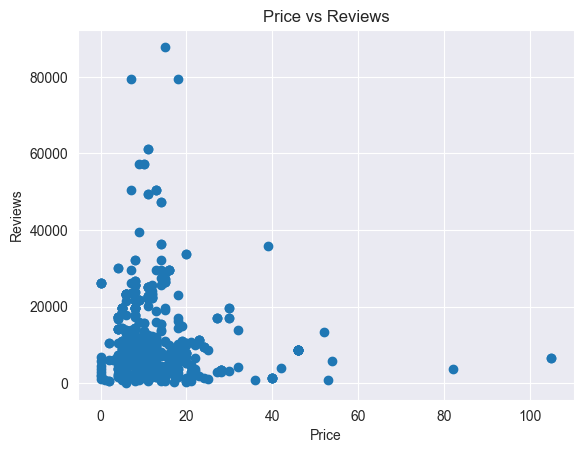

In [31]:
plt.scatter(df['price'], df['reviews'])
plt.xlabel('Price')
plt.ylabel('Reviews')
plt.title('Price vs Reviews')
plt.show()


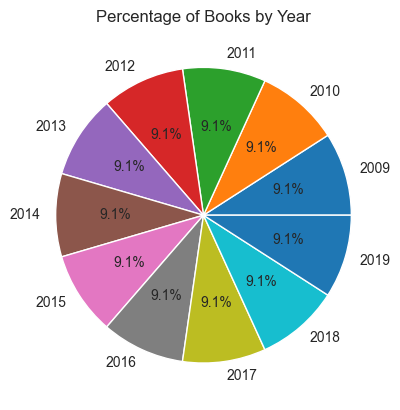

In [33]:
plt.pie(df.groupby('year').size(), labels=df.groupby('year').size().index, autopct='%1.1f%%')
plt.title('Percentage of Books by Year')
plt.show()
